Schedule and PV power used at very bottom.

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import csv


from pyomo.environ import *
from pyomo.gdp import * #Needed for disjunctions


## 3 Jobs, 3 Machines:

In [11]:

TASKS = {
    ('Job1','Machine3')   : {'dur': 2, 'prec': None},
    ('Job1','Machine2') : {'dur': 2, 'prec': ('Job1','Machine3')},
    ('Job1','Machine1')   : {'dur': 3, 'prec': ('Job1','Machine2')},
    ('Job2','Machine1')  : {'dur': 2, 'prec': None},
    ('Job2','Machine2') : {'dur': 2, 'prec': ('Job2','Machine1')},
    ('Job2','Machine3')   : {'dur': 3, 'prec': ('Job2','Machine2')},
    ('Job3','Machine2')  : {'dur': 2, 'prec': None},
    ('Job3','Machine3') : {'dur': 2, 'prec': ('Job3','Machine2')},
    ('Job3','Machine1') : {'dur': 3, 'prec': ('Job3','Machine3')},
}


#Energy rates of job j on machnie m per time period t (kW)
energy_rates = {
    ('Job1', 'Machine1'): 25,
    ('Job1', 'Machine2'): 20,
    ('Job1', 'Machine3'): 35,
    ('Job2', 'Machine1'): 27,
    ('Job2', 'Machine2'): 32,
    ('Job2', 'Machine3'): 37,
    ('Job3', 'Machine1'): 28,
    ('Job3', 'Machine2'): 19,
    ('Job3', 'Machine3'): 36,
}



## 6 Jobs, 3 Machines:

In [12]:
'''

TASKS = {
    ('Job1', 'Machine3'): {'dur': 2, 'prec': None},
    ('Job1', 'Machine2'): {'dur': 2, 'prec': ('Job1', 'Machine3')},
    ('Job1', 'Machine1'): {'dur': 3, 'prec': ('Job1', 'Machine2')},
    ('Job2', 'Machine1'): {'dur': 2, 'prec': None},
    ('Job2', 'Machine2'): {'dur': 2, 'prec': ('Job2', 'Machine1')},
    ('Job2', 'Machine3'): {'dur': 3, 'prec': ('Job2', 'Machine2')},
    ('Job3', 'Machine2'): {'dur': 2, 'prec': None},
    ('Job3', 'Machine3'): {'dur': 2, 'prec': ('Job3', 'Machine2')},
    ('Job3', 'Machine1'): {'dur': 3, 'prec': ('Job3', 'Machine3')},
    ('Job4', 'Machine1'): {'dur': 2, 'prec': None},
    ('Job4', 'Machine2'): {'dur': 2, 'prec': ('Job4', 'Machine1')},
    ('Job4', 'Machine3'): {'dur': 3, 'prec': ('Job4', 'Machine2')},
    ('Job5', 'Machine2'): {'dur': 2, 'prec': None},
    ('Job5', 'Machine3'): {'dur': 2, 'prec': ('Job5', 'Machine2')},
    ('Job5', 'Machine1'): {'dur': 3, 'prec': ('Job5', 'Machine3')},
    ('Job6', 'Machine3'): {'dur': 2, 'prec': None},
    ('Job6', 'Machine1'): {'dur': 2, 'prec': ('Job6', 'Machine3')},
    ('Job6', 'Machine2'): {'dur': 3, 'prec': ('Job6', 'Machine1')},
}



#Energy rates of job j on machnie m per time period t (kW)
energy_rates = {
    ('Job1', 'Machine1'): 25,
    ('Job1', 'Machine2'): 20,
    ('Job1', 'Machine3'): 35,
    ('Job2', 'Machine1'): 27,
    ('Job2', 'Machine2'): 32,
    ('Job2', 'Machine3'): 37,
    ('Job3', 'Machine1'): 28,
    ('Job3', 'Machine2'): 19,
    ('Job3', 'Machine3'): 36,
    ('Job4', 'Machine1'): 26,
    ('Job4', 'Machine2'): 22,
    ('Job4', 'Machine3'): 34,
    ('Job5', 'Machine1'): 29,
    ('Job5', 'Machine2'): 21,
    ('Job5', 'Machine3'): 35,
    ('Job6', 'Machine1'): 27,
    ('Job6', 'Machine2'): 20,
    ('Job6', 'Machine3'): 33,
}


'''




"\n\nTASKS = {\n    ('Job1', 'Machine3'): {'dur': 2, 'prec': None},\n    ('Job1', 'Machine2'): {'dur': 2, 'prec': ('Job1', 'Machine3')},\n    ('Job1', 'Machine1'): {'dur': 3, 'prec': ('Job1', 'Machine2')},\n    ('Job2', 'Machine1'): {'dur': 2, 'prec': None},\n    ('Job2', 'Machine2'): {'dur': 2, 'prec': ('Job2', 'Machine1')},\n    ('Job2', 'Machine3'): {'dur': 3, 'prec': ('Job2', 'Machine2')},\n    ('Job3', 'Machine2'): {'dur': 2, 'prec': None},\n    ('Job3', 'Machine3'): {'dur': 2, 'prec': ('Job3', 'Machine2')},\n    ('Job3', 'Machine1'): {'dur': 3, 'prec': ('Job3', 'Machine3')},\n    ('Job4', 'Machine1'): {'dur': 2, 'prec': None},\n    ('Job4', 'Machine2'): {'dur': 2, 'prec': ('Job4', 'Machine1')},\n    ('Job4', 'Machine3'): {'dur': 3, 'prec': ('Job4', 'Machine2')},\n    ('Job5', 'Machine2'): {'dur': 2, 'prec': None},\n    ('Job5', 'Machine3'): {'dur': 2, 'prec': ('Job5', 'Machine2')},\n    ('Job5', 'Machine1'): {'dur': 3, 'prec': ('Job5', 'Machine3')},\n    ('Job6', 'Machine3'): {'d

## 6 jobs 6 machines
Note: Job-shop setup, so not every job has to go to each machine. 

In [13]:
'''
TASKS = {
    ('Job1', 'Machine6'): {'dur': 2, 'prec': None},
    ('Job1', 'Machine5'): {'dur': 1, 'prec': ('Job1', 'Machine6')},
    ('Job1', 'Machine4'): {'dur': 2, 'prec': ('Job1', 'Machine5')},
    ('Job1', 'Machine3'): {'dur': 3, 'prec': ('Job1', 'Machine4')},
    ('Job1', 'Machine2'): {'dur': 2, 'prec': ('Job1', 'Machine3')},
    ('Job1', 'Machine1'): {'dur': 4, 'prec': ('Job1', 'Machine2')},
    ('Job2', 'Machine1'): {'dur': 3, 'prec': None},
    ('Job2', 'Machine2'): {'dur': 1, 'prec': ('Job2', 'Machine1')},
    ('Job2', 'Machine3'): {'dur': 2, 'prec': ('Job2', 'Machine2')},
    ('Job2', 'Machine4'): {'dur': 2, 'prec': ('Job2', 'Machine3')},
    ('Job2', 'Machine5'): {'dur': 3, 'prec': ('Job2', 'Machine4')},
    ('Job2', 'Machine6'): {'dur': 1, 'prec': ('Job2', 'Machine5')},
    ('Job3', 'Machine2'): {'dur': 2, 'prec': None},
    ('Job3', 'Machine3'): {'dur': 1, 'prec': ('Job3', 'Machine2')},
    ('Job3', 'Machine4'): {'dur': 2, 'prec': ('Job3', 'Machine3')},
    ('Job3', 'Machine5'): {'dur': 3, 'prec': ('Job3', 'Machine4')},
    ('Job3', 'Machine6'): {'dur': 2, 'prec': ('Job3', 'Machine5')},
    ('Job3', 'Machine1'): {'dur': 4, 'prec': ('Job3', 'Machine6')},
    ('Job4', 'Machine3'): {'dur': 2, 'prec': None},
    ('Job4', 'Machine2'): {'dur': 1, 'prec': ('Job4', 'Machine3')},
    ('Job4', 'Machine1'): {'dur': 3, 'prec': ('Job4', 'Machine2')},
    ('Job4', 'Machine4'): {'dur': 2, 'prec': ('Job4', 'Machine1')},
    ('Job4', 'Machine5'): {'dur': 3, 'prec': ('Job4', 'Machine4')},
    ('Job4', 'Machine6'): {'dur': 1, 'prec': ('Job4', 'Machine5')},
    ('Job5', 'Machine5'): {'dur': 2, 'prec': None},
    ('Job5', 'Machine4'): {'dur': 2, 'prec': ('Job5', 'Machine5')},
    ('Job5', 'Machine3'): {'dur': 3, 'prec': ('Job5', 'Machine4')},
    ('Job5', 'Machine2'): {'dur': 1, 'prec': ('Job5', 'Machine3')},
    ('Job5', 'Machine1'): {'dur': 4, 'prec': ('Job5', 'Machine2')},
    ('Job5', 'Machine6'): {'dur': 2, 'prec': ('Job5', 'Machine1')},
    ('Job6', 'Machine1'): {'dur': 3, 'prec': None},
    ('Job6', 'Machine2'): {'dur': 2, 'prec': ('Job6', 'Machine1')},
    ('Job6', 'Machine3'): {'dur': 1, 'prec': ('Job6', 'Machine2')},
    ('Job6', 'Machine4'): {'dur': 2, 'prec': ('Job6', 'Machine3')},
    ('Job6', 'Machine5'): {'dur': 3, 'prec': ('Job6', 'Machine4')},
    ('Job6', 'Machine6'): {'dur': 2, 'prec': ('Job6', 'Machine5')},
}



energy_rates = {
    ('Job1', 'Machine1'): 22,
    ('Job1', 'Machine2'): 18,
    ('Job1', 'Machine3'): 30,
    ('Job1', 'Machine4'): 25,
    ('Job1', 'Machine5'): 20,
    ('Job1', 'Machine6'): 15,
    ('Job2', 'Machine1'): 28,
    ('Job2', 'Machine2'): 32,
    ('Job2', 'Machine3'): 26,
    ('Job2', 'Machine4'): 21,
    ('Job2', 'Machine5'): 19,
    ('Job2', 'Machine6'): 24,
    ('Job3', 'Machine1'): 23,
    ('Job3', 'Machine2'): 17,
    ('Job3', 'Machine3'): 31,
    ('Job3', 'Machine4'): 29,
    ('Job3', 'Machine5'): 22,
    ('Job3', 'Machine6'): 20,
    ('Job4', 'Machine1'): 26,
    ('Job4', 'Machine2'): 22,
    ('Job4', 'Machine3'): 18,
    ('Job4', 'Machine4'): 30,
    ('Job4', 'Machine5'): 25,
    ('Job4', 'Machine6'): 21,
    ('Job5', 'Machine1'): 24,
    ('Job5', 'Machine2'): 20,
    ('Job5', 'Machine3'): 35,
    ('Job5', 'Machine4'): 28,
    ('Job5', 'Machine5'): 23,
    ('Job5', 'Machine6'): 19,
    ('Job6', 'Machine1'): 27,
    ('Job6', 'Machine2'): 29,
    ('Job6', 'Machine3'): 24,
    ('Job6', 'Machine4'): 22,
    ('Job6', 'Machine5'): 18,
    ('Job6', 'Machine6'): 16,
}

'''


"\nTASKS = {\n    ('Job1', 'Machine6'): {'dur': 2, 'prec': None},\n    ('Job1', 'Machine5'): {'dur': 1, 'prec': ('Job1', 'Machine6')},\n    ('Job1', 'Machine4'): {'dur': 2, 'prec': ('Job1', 'Machine5')},\n    ('Job1', 'Machine3'): {'dur': 3, 'prec': ('Job1', 'Machine4')},\n    ('Job1', 'Machine2'): {'dur': 2, 'prec': ('Job1', 'Machine3')},\n    ('Job1', 'Machine1'): {'dur': 4, 'prec': ('Job1', 'Machine2')},\n    ('Job2', 'Machine1'): {'dur': 3, 'prec': None},\n    ('Job2', 'Machine2'): {'dur': 1, 'prec': ('Job2', 'Machine1')},\n    ('Job2', 'Machine3'): {'dur': 2, 'prec': ('Job2', 'Machine2')},\n    ('Job2', 'Machine4'): {'dur': 2, 'prec': ('Job2', 'Machine3')},\n    ('Job2', 'Machine5'): {'dur': 3, 'prec': ('Job2', 'Machine4')},\n    ('Job2', 'Machine6'): {'dur': 1, 'prec': ('Job2', 'Machine5')},\n    ('Job3', 'Machine2'): {'dur': 2, 'prec': None},\n    ('Job3', 'Machine3'): {'dur': 1, 'prec': ('Job3', 'Machine2')},\n    ('Job3', 'Machine4'): {'dur': 2, 'prec': ('Job3', 'Machine3')},\

## 7 jobs, 3 machines

In [14]:
'''
TASKS = {
    ('Job1', 'Machine1'): {'dur': 2, 'prec': None},
    ('Job1', 'Machine2'): {'dur': 3, 'prec': ('Job1', 'Machine1')},
    ('Job1', 'Machine3'): {'dur': 1, 'prec': ('Job1', 'Machine2')},
    ('Job2', 'Machine1'): {'dur': 1, 'prec': None},
    ('Job2', 'Machine2'): {'dur': 2, 'prec': ('Job2', 'Machine1')},
    ('Job2', 'Machine3'): {'dur': 3, 'prec': ('Job2', 'Machine2')},
    ('Job3', 'Machine1'): {'dur': 3, 'prec': None},
    ('Job3', 'Machine2'): {'dur': 1, 'prec': ('Job3', 'Machine1')},
    ('Job3', 'Machine3'): {'dur': 2, 'prec': ('Job3', 'Machine2')},
    ('Job4', 'Machine1'): {'dur': 2, 'prec': None},
    ('Job4', 'Machine2'): {'dur': 3, 'prec': ('Job4', 'Machine1')},
    ('Job4', 'Machine3'): {'dur': 1, 'prec': ('Job4', 'Machine2')},
    ('Job5', 'Machine1'): {'dur': 1, 'prec': None},
    ('Job5', 'Machine2'): {'dur': 2, 'prec': ('Job5', 'Machine1')},
    ('Job5', 'Machine3'): {'dur': 3, 'prec': ('Job5', 'Machine2')},
    ('Job6', 'Machine1'): {'dur': 3, 'prec': None},
    ('Job6', 'Machine2'): {'dur': 1, 'prec': ('Job6', 'Machine1')},
    ('Job6', 'Machine3'): {'dur': 2, 'prec': ('Job6', 'Machine2')},
    ('Job7', 'Machine1'): {'dur': 2, 'prec': None},
    ('Job7', 'Machine2'): {'dur': 3, 'prec': ('Job7', 'Machine1')},
    ('Job7', 'Machine3'): {'dur': 1, 'prec': ('Job7', 'Machine2')},
}


energy_rates = {
    ('Job1', 'Machine1'): 20,
    ('Job1', 'Machine2'): 25,
    ('Job1', 'Machine3'): 15,
    ('Job2', 'Machine1'): 22,
    ('Job2', 'Machine2'): 27,
    ('Job2', 'Machine3'): 17,
    ('Job3', 'Machine1'): 23,
    ('Job3', 'Machine2'): 28,
    ('Job3', 'Machine3'): 18,
    ('Job4', 'Machine1'): 19,
    ('Job4', 'Machine2'): 24,
    ('Job4', 'Machine3'): 14,
    ('Job5', 'Machine1'): 21,
    ('Job5', 'Machine2'): 26,
    ('Job5', 'Machine3'): 16,
    ('Job6', 'Machine1'): 18,
    ('Job6', 'Machine2'): 23,
    ('Job6', 'Machine3'): 13,
    ('Job7', 'Machine1'): 20,
    ('Job7', 'Machine2'): 25,
    ('Job7', 'Machine3'): 15,
}
'''

"\nTASKS = {\n    ('Job1', 'Machine1'): {'dur': 2, 'prec': None},\n    ('Job1', 'Machine2'): {'dur': 3, 'prec': ('Job1', 'Machine1')},\n    ('Job1', 'Machine3'): {'dur': 1, 'prec': ('Job1', 'Machine2')},\n    ('Job2', 'Machine1'): {'dur': 1, 'prec': None},\n    ('Job2', 'Machine2'): {'dur': 2, 'prec': ('Job2', 'Machine1')},\n    ('Job2', 'Machine3'): {'dur': 3, 'prec': ('Job2', 'Machine2')},\n    ('Job3', 'Machine1'): {'dur': 3, 'prec': None},\n    ('Job3', 'Machine2'): {'dur': 1, 'prec': ('Job3', 'Machine1')},\n    ('Job3', 'Machine3'): {'dur': 2, 'prec': ('Job3', 'Machine2')},\n    ('Job4', 'Machine1'): {'dur': 2, 'prec': None},\n    ('Job4', 'Machine2'): {'dur': 3, 'prec': ('Job4', 'Machine1')},\n    ('Job4', 'Machine3'): {'dur': 1, 'prec': ('Job4', 'Machine2')},\n    ('Job5', 'Machine1'): {'dur': 1, 'prec': None},\n    ('Job5', 'Machine2'): {'dur': 2, 'prec': ('Job5', 'Machine1')},\n    ('Job5', 'Machine3'): {'dur': 3, 'prec': ('Job5', 'Machine2')},\n    ('Job6', 'Machine1'): {'dur

In [15]:
battery_capacity = 50.0  # B_cap in kWh
battery_charge_limit = 10.0  # B_ch in kW
battery_discharge_limit = 10.0  # B_dch in kW

In [16]:
# Sample TOU rates for 24 hour period. Euros per kWh. 00:00am - 00:00am
# Must have at least workday_hour amount of values for the tou_rates
tou_rates = [0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.40, 0.60, 0.60, 0.40, 0.40, 0.40, 0.40, 0.20]

In [17]:
#Future predicted PV power output from the predictive model. 
predicted_PV_output_list = []

with open ("future_PV_power_predictions.csv", "r") as file:
    csv_reader = csv.reader(file)
    next(csv_reader) #Skip heading row
    
    for row in csv_reader:
        predicted_PV_output_list.append(float(row[1]) / 1000)

print("Predicted PV Power Output (kw):", predicted_PV_output_list) #Must have at least workday_hours amount of values for predicted PV power
pv_generation = predicted_PV_output_list


# Summer sample PV generation data (in kW) for 01/06/2020 from 00:00am - 00:00am from PVGIS database for a 50kW peak PV system
#pv_generation = [0, 0, 0, 0, 0, 0.656, 1.803, 6.997, 16.5747, 25.7345, 29.4745, 35.707, 38.474, 35.212, 28.547, 25.4645, 23.342, 9.8065, 5.241, 1.066, 0, 0, 0, 0]

#Scenario with no PV power available
#pv_generation = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Winter sample PV generation data (in kW) for 01/12/2020. from 00:00am - 00:00am from PVGIS database for a 50kW peak PV system. 
#pv_generation = [0, 0, 0, 0, 0, 0, 0, 0, 0.669, 3.641, 2.590, 8.359, 13.858, 22.788, 1.462, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Predicted PV Power Output (kw): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.48158095992051214, 2.24160650754933, 4.253793079058698, 3.3913887557996576, 6.659627138059514, 18.677718803903325, 21.12767040709843, 15.653866184373594, 7.279215696257373, 1.0645217690069995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [18]:
workday_hours = 24
time_slots = range(workday_hours)

def jobshop_model(TASKS):
    
    # Initialize the model
    model = ConcreteModel()

    # Set of time periods when the factory is operational
    model.Tp = Set(initialize=time_slots)

    # Set of tasks (job, machine)
    model.TASKS = Set(initialize = TASKS.keys(), dimen=2)

    # Set of jobs
    model.J = Set(initialize = list(set([j for (j,m) in model.TASKS])))

    # Set of machines
    model.M = Set(initialize = list(set([m for (j,m) in model.TASKS])))

    # the order of tasks is constructed as a cross-product of tasks and filtering
    model.TASKORDER = Set(initialize = model.TASKS * model.TASKS, dimen=4, 
            filter = lambda model, j, m, k, n: (k,n) == TASKS[(j,m)]['prec'])

    # the set of disjunctions is cross-product of jobs, jobs, and machines
    model.DISJUNCTIONS = Set(initialize = model.J * model.J * model.M, dimen=3,
            filter = lambda model, j, k, m: j < k and (j,m) in model.TASKS and (k,m) in model.TASKS)




    # Parameters
    model.Rg = Param(model.Tp, initialize={t: tou_rates[t] for t in model.Tp})
    model.Gs = Param(model.Tp, initialize={t: pv_generation[t] for t in model.Tp})
    model.B_cap = Param(initialize=battery_capacity)
    model.B_ch = Param(initialize=battery_charge_limit)
    model.B_dch = Param(initialize=battery_discharge_limit)
    model.dur = Param(model.TASKS, initialize=lambda model, j, m: TASKS[(j,m)]['dur'])
    model.ejm = Param(model.J, model.M, initialize=energy_rates)
    model.B_initial = Param(initialize=0)  # Assuming the battery is empty at the start of the planning horizon, but this can be manually altered. 


    #Decision varaibles
    model.Et_grid = Var(model.Tp, domain=NonNegativeReals)
    model.Et_pv = Var(model.Tp, domain=NonNegativeReals)
    model.Et_in = Var(model.Tp, domain=NonNegativeReals)
    model.Et_out = Var(model.Tp, domain=NonNegativeReals)
    model.Bt = Var(model.Tp, domain=NonNegativeReals, bounds=(0, model.B_cap))
    model.Ct = Var(model.Tp, domain=Binary)
    model.Dt = Var(model.Tp, domain=Binary)
    model.Xjmt = Var(model.J, model.M, model.Tp, domain=Binary) #1 if job j starts processing on machine m during time interval t, 0 otherwise
    model.Yjmt = Var(model.J, model.M, model.Tp, domain=Binary) #1 if job j is being processed on machine m at time t, 0 otherwise
    model.makespan = Var(bounds=(0, workday_hours))


    # Objective Function. The electricity cost in Euros. 
    def objective_rule(model):
        return sum(model.Rg[t] * model.Et_grid[t] for t in model.Tp)

    model.Objective = Objective(rule=objective_rule, sense=minimize)

    # Constraints

    def electricity_balance_rule(model, t):
        return model.Et_grid[t] + model.Et_pv[t] + model.Et_out[t] - model.Et_in[t] == sum(model.ejm[j, m] * model.Yjmt[j, m, t] for j in model.J for m in model.M)
    model.ElectricityBalance = Constraint(model.Tp, rule=electricity_balance_rule)

    def pv_power_constraint_rule(model, t):
        return model.Et_pv[t] <= model.Gs[t]
    model.PVPowerConstraint = Constraint(model.Tp, rule=pv_power_constraint_rule)

    def battery_capacity_limit_rule(model, t):
        return model.Bt[t] <= model.B_cap
    model.BatteryCapacityLimit = Constraint(model.Tp, rule=battery_capacity_limit_rule)

    def battery_charging_limit_rule(model, t):
        return model.Et_in[t] <= model.B_ch * model.Ct[t]
    model.BatteryChargingLimit = Constraint(model.Tp, rule=battery_charging_limit_rule)

    def battery_discharging_limit_rule(model, t):
        return model.Et_out[t] <= model.B_dch * model.Dt[t]
    model.BatteryDischargingLimit = Constraint(model.Tp, rule=battery_discharging_limit_rule)
    
    def charging_discharging_rule(model, t):
        return model.Ct[t] + model.Dt[t] <= 1
    model.ChargingDischarging = Constraint(model.Tp, rule=charging_discharging_rule)

    def battery_balancing_rule(model, t):
        if t == model.Tp.first(): #To handle any initial charge in the battery before the first time step
            return model.Bt[t] == model.B_initial + model.Et_in[t] - model.Et_out[t]
        else:
            previous_t = model.Tp.prev(t)
            return model.Bt[t] == model.Bt[previous_t] + model.Et_in[t] - model.Et_out[t]
    model.BatteryBalancing = Constraint(model.Tp, rule=battery_balancing_rule)
    
        #For each job j and machine m, if xjmt = 1, then yjmt should be 1 for the full duration of the job processing time
    def job_running_rule(model, j, m, t):
        return sum(model.Yjmt[j, m, t_prime] for t_prime in range(t, min(t + model.dur[j, m], workday_hours))) >= model.dur[j, m] * model.Xjmt[j, m, t]
    model.JobRunning = Constraint(model.J, model.M, model.Tp, rule=job_running_rule)

    # This constraint ensures that each task in each job in TASKS is processed only once. 
    def job_processing_requirement_rule(model, j, m):
        if (j, m) in model.TASKS:  # Only apply if the job-machine pair is in TASKS
            return sum(model.Xjmt[j, m, t] for t in model.Tp) == 1
        else:
            return Constraint.Skip  # Skip the constraint for job-machine pairs not in TASKS
    model.JobProcessingRequirement = Constraint(model.J, model.M, rule=job_processing_requirement_rule)
    
    #Ensures all jobs must be finished before the specified makespan
    def finish_rule(model, j, m):
        return sum(t * model.Xjmt[j, m, t] for t in model.Tp) + model.dur[j, m] <= model.makespan
    model.finish = Constraint(model.TASKS, rule=finish_rule)

   # Ensures that for each job, a task cannot start until the preceding task has finished
    def preceding_rule(model, j, m, k, n):
        return sum(t * model.Xjmt[k, n, t] for t in model.Tp) + model.dur[k, n] <= sum(t * model.Xjmt[j, m, t] for t in model.Tp)
    model.preceding = Constraint(model.TASKORDER, rule=preceding_rule)

    #Constraint that there can be no overlap of tasks, i.e. a machine can only process one task at a time. 
    model.disjunctions = Disjunction(model.DISJUNCTIONS, rule=lambda model,j,k,m:
        [sum(t * model.Xjmt[j, m, t] for t in model.Tp) + model.dur[j,m] <= sum(t * model.Xjmt[k, m, t] for t in model.Tp), 
        sum(t * model.Xjmt[k, m, t] for t in model.Tp) + model.dur[k,m] <= sum(t * model.Xjmt[j, m, t] for t in model.Tp)])

    TransformationFactory('gdp.hull').apply_to(model)
    return model
jobshop_model(TASKS)

In [19]:
def jobshop_solve(model):
    # Solve the model using the Gurobi solver
    SolverFactory('gurobi').solve(model)

    # Initialize an empty list to store results
    results = []

    # Iterate over each task in the model
    for j, m in model.TASKS:
        # Calculate the start time for the task
        start_time = sum(t * model.Xjmt[j, m, t].value for t in model.Tp)
        duration = model.dur[j, m]  # Get the duration of the task
        finish_time = start_time + duration  # Calculate the finish time

        # Append the task details to the results list
        results.append({
            'Job': j,
            'Machine': m,
            'Start': start_time,
            'Duration': duration,
            'Finish': finish_time
        })

    return results


In [20]:
import time

# Create and solve the model
created_model = jobshop_model(TASKS)

#Time how long it takes the model to solve
start_time = time.time()

results = jobshop_solve(created_model)

end_time = time.time()

time_taken_to_solve = end_time - start_time

print(f"Time taken = {time_taken_to_solve} seconds")

# Print the results
print("Scheduling Results:")
for res in results:
    print(f"Job: {res['Job']}, Machine: {res['Machine']}, Start: {res['Start']}, Duration: {res['Duration']}, Finish: {res['Finish']}")

# Display the total electricity costs (objective function value)
total_electricity_costs = created_model.Objective.expr()
print(f"Total Electricity Costs: €{total_electricity_costs}")

#Display the results
created_model.display()


Time taken = 0.7905645370483398 seconds
Scheduling Results:
Job: Job1, Machine: Machine3, Start: 0.0, Duration: 2, Finish: 2.0
Job: Job1, Machine: Machine2, Start: 6.0, Duration: 2, Finish: 8.0
Job: Job1, Machine: Machine1, Start: 14.0, Duration: 3, Finish: 17.0
Job: Job2, Machine: Machine1, Start: 0.0, Duration: 2, Finish: 2.0
Job: Job2, Machine: Machine2, Start: 2.0, Duration: 2, Finish: 4.0
Job: Job2, Machine: Machine3, Start: 5.0, Duration: 3, Finish: 8.0
Job: Job3, Machine: Machine2, Start: 0.0, Duration: 2, Finish: 2.0
Job: Job3, Machine: Machine3, Start: 2.0, Duration: 2, Finish: 4.0
Job: Job3, Machine: Machine1, Start: 4.0, Duration: 3, Finish: 7.0
Total Electricity Costs: €107.1025496328474
Model unknown

  Variables:
    Et_grid : Size=24, Index=Tp
        Key : Lower : Value             : Upper : Fixed : Stale : Domain
          0 :     0 :              81.0 :  None : False : False : NonNegativeReals
          1 :     0 :              81.0 :  None : False : False : NonNegati

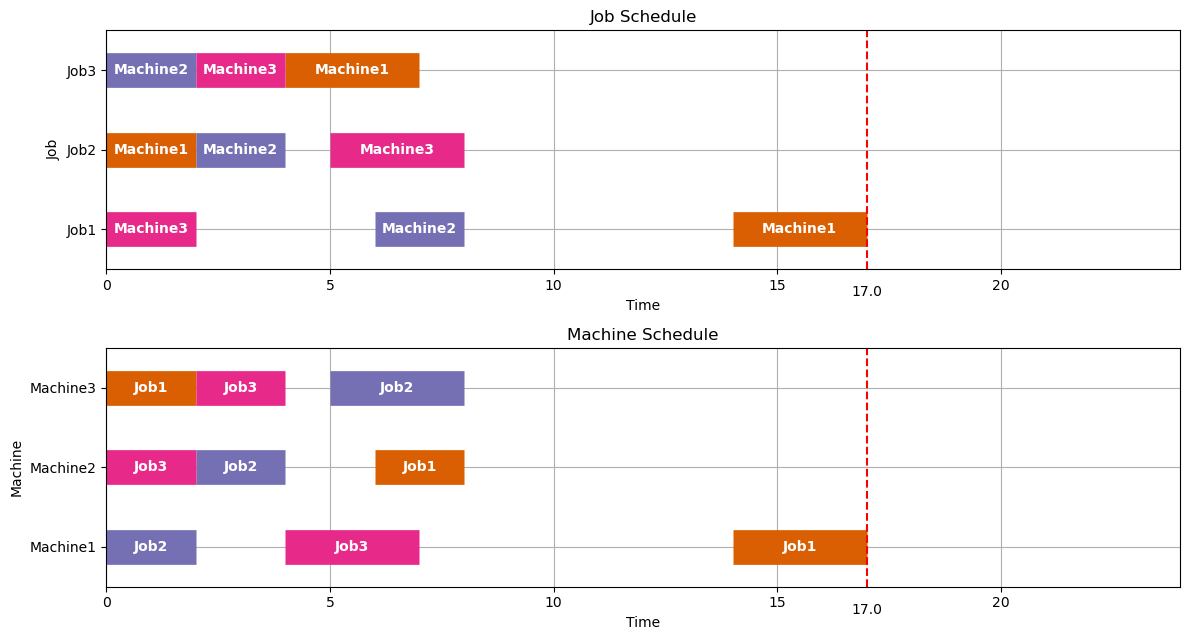

In [21]:
def visualize(results, workday_hours):
    schedule = pd.DataFrame(results)
    JOBS = sorted(list(schedule['Job'].unique()))
    MACHINES = sorted(list(schedule['Machine'].unique()))
    makespan = schedule['Finish'].max()

    bar_style = {'alpha':1.0, 'lw':25, 'solid_capstyle':'butt'}
    text_style = {'color':'white', 'weight':'bold', 'ha':'center', 'va':'center'}
    colors = mpl.cm.Dark2.colors

    schedule.sort_values(by=['Job', 'Start'])
    schedule.set_index(['Job', 'Machine'], inplace=True)

    fig, ax = plt.subplots(2, 1, figsize=(12, 5 + (len(JOBS) + len(MACHINES)) / 4))

    for jdx, j in enumerate(JOBS, 1):
        for mdx, m in enumerate(MACHINES, 1):
            if (j, m) in schedule.index:
                xs = schedule.loc[(j, m), 'Start']
                xf = schedule.loc[(j, m), 'Finish']
                ax[0].plot([xs, xf], [jdx] * 2, c=colors[mdx % 7], **bar_style)
                ax[0].text((xs + xf) / 2, jdx, m, **text_style)
                ax[1].plot([xs, xf], [mdx] * 2, c=colors[jdx % 7], **bar_style)
                ax[1].text((xs + xf) / 2, mdx, j, **text_style)

    ax[0].set_title('Job Schedule')
    ax[0].set_ylabel('Job')
    ax[1].set_title('Machine Schedule')
    ax[1].set_ylabel('Machine')

    for idx in range(2):
        ax[idx].set_xlim(0, workday_hours)
        ax[idx].set_ylim(0.5, len(JOBS if idx == 0 else MACHINES) + 0.5)
        ax[idx].set_yticks(range(1, 1 + len(JOBS if idx == 0 else MACHINES)))
        ax[idx].set_yticklabels(JOBS if idx == 0 else MACHINES)
        ax[idx].text(makespan, ax[idx].get_ylim()[0] - 0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
        ax[idx].plot([makespan] * 2, ax[idx].get_ylim(), 'r--')
        ax[idx].set_xlabel('Time')
        ax[idx].grid(True)

    fig.tight_layout()
    plt.show()


created_model = jobshop_model(TASKS)
results = jobshop_solve(created_model)

# Visualize the results
visualize(results, workday_hours)


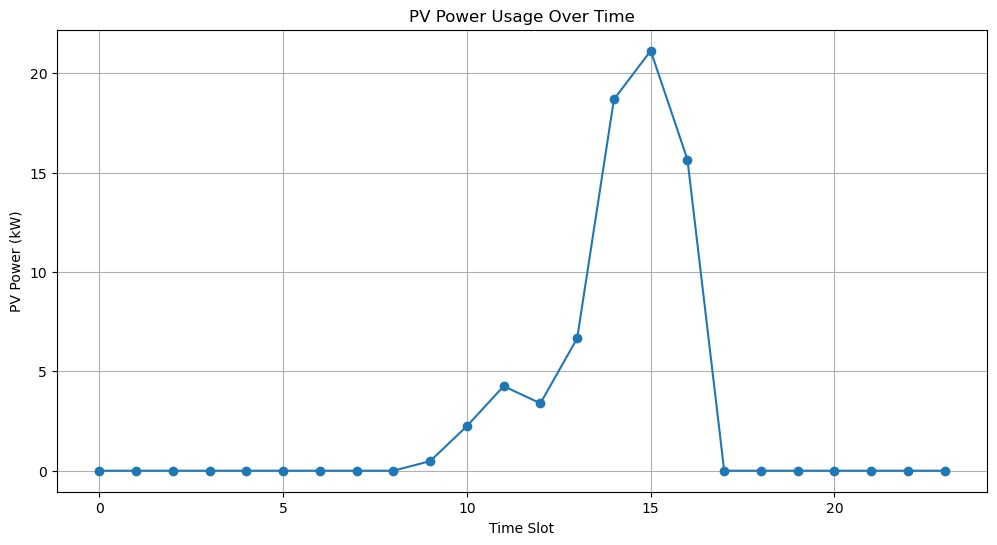

In [22]:
import matplotlib.pyplot as plt

def extract_pv_power_data(model):
    pv_power_data = [model.Et_pv[t].value for t in model.Tp]
    return pv_power_data

def plot_pv_power(pv_power_data, time_slots):
    plt.figure(figsize=(12, 6))
    plt.plot(time_slots, pv_power_data, marker='o')
    plt.title('PV Power Usage Over Time')
    plt.xlabel('Time Slot')
    plt.ylabel('PV Power (kW)')
    plt.grid(True)
    plt.show()


pv_power_data = extract_pv_power_data(created_model)
time_slots = list(created_model.Tp)

# Plot the PV power usage
plot_pv_power(pv_power_data, time_slots)